In [8]:
import requests

# Replace 'YOUR_API_KEY' with the provided OpenWeather API key
API_KEY = 'c446b12235ca04ae9dd8acc54f8c9107'
# Replace 'YOUR_CITY' with the city you want to get the weather for
city = input()

# Define the API URL
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}'

try:
    # Send a GET request to the OpenWeather API
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        weather_data = response.json()
        print(weather_data)
    else:

        print(f"Error: {response.status_code} - {response.text}")
except Exception as e:
    print(f"An error occurred: {e}")


{'coord': {'lon': -87.65, 'lat': 41.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 284.86, 'feels_like': 284.23, 'temp_min': 283.83, 'temp_max': 285.47, 'pressure': 1005, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 300, 'gust': 9.26}, 'clouds': {'all': 100}, 'dt': 1697813753, 'sys': {'type': 2, 'id': 2005153, 'country': 'US', 'sunrise': 1697803691, 'sunset': 1697842939}, 'timezone': -18000, 'id': 4887398, 'name': 'Chicago', 'cod': 200}


In [9]:
import psycopg2

In [11]:
hostname = 'localhost'
database = 'joelmendonsa'
username = 'postgres'
pwd = 'Duke#7539'
port_id = 5432

try:
    # Establish a connection to the PostgreSQL database
    conn = psycopg2.connect(
        host=hostname,
        database=database,
        user=username,
        password=pwd,
        port=port_id
    )

    # Create a cursor object to interact with the database
    cur = conn.cursor()

    # SQL statement to create a new table
    create_table_query = """
    CREATE TABLE IF NOT EXISTS New_table (
        id serial PRIMARY KEY,
        name VARCHAR(255),
        age INT
    );
    """

    # Execute the create table query
    cur.execute(create_table_query)

    # Commit the changes to the database
    conn.commit()
    print("Table created successfully.")

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the cursor and database connection
    if cur:
        cur.close()
    if conn:
        conn.close()


Table created successfully.


In [5]:
import requests

API_KEY = 'c446b12235ca04ae9dd8acc54f8c9107'
city = 'Chicago'

url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}'

try:
    response = requests.get(url)
    if response.status_code == 200:
        weather_data = response.json()
        temperature = weather_data['main']['temp']
        humidity = weather_data['main']['humidity']
        description = weather_data['weather'][0]['description']
        country = weather_data['sys']['country']
        city_name = weather_data['name']
        print(f"The Country is: {country}")
        print(f"City is : {city_name}")
        print(f"Temperature: {temperature} K")
        print(f"Humidity: {humidity}%")
        print(f"Description: {description}")
    else:
        print(f"Error: {response.status_code} - {response.text}")
except Exception as e:
    print(f"An error occurred: {e}")



The Country is: US
City is : Chicago
Temperature: 285.29 K
Humidity: 77%
Description: overcast clouds


QUESTION 1 

In [6]:
import requests
import psycopg2
API_KEY = 'c446b12235ca04ae9dd8acc54f8c9107'
city = input("Enter the city name")
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}'

db_params = {'dbname': 'joelmendonsa', 'user': 'postgres', 'password': 'Duke#7539', 'host': 'localhost', 'port': 5432}

conn = psycopg2.connect(**db_params)
cursor = conn.cursor()

create_table_query = """CREATE TABLE IF NOT EXISTS weather_data (city_name VARCHAR(255), country VARCHAR(255), temperature FLOAT, humidity INT, description VARCHAR(255));"""
cursor.execute(create_table_query)
conn.commit()

response = requests.get(url)
if response.status_code == 200:
    weather_data = response.json()
    temperature, humidity, description = weather_data['main']['temp'], weather_data['main']['humidity'], weather_data['weather'][0]['description']
    country, city_name = weather_data['sys']['country'], weather_data['name']
    insert_query = """INSERT INTO weather_data (city_name, country, temperature, humidity, description) VALUES (%s, %s, %s, %s, %s);"""
    cursor.execute(insert_query, (city_name, country, temperature, humidity, description))
    conn.commit()
    print("Data inserted successfully.")
else:
    print(f"Error: {response.status_code} - {response.text}")
    
cursor.close()
conn.close()


Data inserted successfully.


In [8]:
try:
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()
    cursor.execute("SELECT city_name, country, temperature, humidity, description FROM weather_data")
    rows = cursor.fetchall()
    for row in rows:
        print(f"City: {row[0]}, Country: {row[1]}")
        print(f"Temperature: {row[2]} K")
        print(f"Humidity: {row[3]}%")
        print(f"Description: {row[4]}\n")
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if cursor:
        cursor.close()
    if conn:
        conn.close()


City: Tokyo, Country: JP
Temperature: 294.09 K
Humidity: 59%
Description: broken clouds



Question 2 

In [24]:
import requests

# Define the URL for the Fake Store API
api_url = 'https://fakestoreapi.com/carts'

try:
    # Send a GET request to the Fake Store API
    response = requests.get(api_url)

    # Check if the request was successful
    if response.status_code == 200:
        cart_data = response.json()

        # Loop through the cart data and extract and print customer information
        for cart in cart_data:
            user_id = cart['userId']

            # Fetch user information from a separate API endpoint
            user_info_url = f'https://fakestoreapi.com/users/{user_id}'
            user_info_response = requests.get(user_info_url)
            user_info = user_info_response.json()

            print("Customer Information:")
            print(f"Name: {user_info['name']}")
            print(f"Email: {user_info['email']}")
            print(f"Address: {user_info['address']['street']}, {user_info['address']['city']}, {user_info['address']['zipcode']}")
            print("\n")
        cart_new_data = response.json()

        # Loop through the cart data and extract and print product information
        for cart in cart_new_data:
            for product in cart['products']:
                product_id = product['productId']
                quantity = product['quantity']
                print(f"Product ID: {product_id}, Quantity: {quantity}")
    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")


Customer Information:
Name: {'firstname': 'john', 'lastname': 'doe'}
Email: john@gmail.com
Address: new road, kilcoole, 12926-3874


Customer Information:
Name: {'firstname': 'john', 'lastname': 'doe'}
Email: john@gmail.com
Address: new road, kilcoole, 12926-3874


Customer Information:
Name: {'firstname': 'david', 'lastname': 'morrison'}
Email: morrison@gmail.com
Address: Lovers Ln, kilcoole, 12926-3874


Customer Information:
Name: {'firstname': 'kevin', 'lastname': 'ryan'}
Email: kevin@gmail.com
Address: Frances Ct, Cullman, 29567-1452


Customer Information:
Name: {'firstname': 'kevin', 'lastname': 'ryan'}
Email: kevin@gmail.com
Address: Frances Ct, Cullman, 29567-1452


Customer Information:
Name: {'firstname': 'don', 'lastname': 'romer'}
Email: don@gmail.com
Address: Hunters Creek Dr, San Antonio, 98234-1734


Customer Information:
Name: {'firstname': 'william', 'lastname': 'hopkins'}
Email: william@gmail.com
Address: vally view ln, mesa, 96378-0245


Product ID: 1, Quantity: 4
P

In [26]:
import requests

# Define the URL for the Fake Store API
api_url = 'https://fakestoreapi.com/carts'

try:
    # Send a GET request to the Fake Store API
    response = requests.get(api_url)

    # Check if the request was successful
    if response.status_code == 200:
        cart_data = response.json()

        # Limit the loop to 10 iterations
        for i, cart in enumerate(cart_data):
            if i >= 10:
                break

            print("Product Information:")
            for product in cart['products']:
                product_id = product['productId']
                quantity = product['quantity']
                print(f"Product ID: {product_id}, Quantity: {quantity}")
                print()

            user_id = cart['userId']

            # Fetch user information from a separate API endpoint
            user_info_url = f'https://fakestoreapi.com/users/{user_id}'
            user_info_response = requests.get(user_info_url)
            user_info = user_info_response.json()

            print("Customer Information:")
            print(f"Name: {user_info['name']}")
            print(f"Email: {user_info['email']}")
            address = user_info.get('address', {})
            print(f"Address: {address.get('street', 'N/A')}, {address.get('city', 'N/A')}, {address.get('zipcode', 'N/A')}")
            print("\n")

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")



Product Information:
Product ID: 1, Quantity: 4

Product ID: 2, Quantity: 1

Product ID: 3, Quantity: 6

Customer Information:
Name: {'firstname': 'john', 'lastname': 'doe'}
Email: john@gmail.com
Address: new road, kilcoole, 12926-3874


Product Information:
Product ID: 2, Quantity: 4

Product ID: 1, Quantity: 10

Product ID: 5, Quantity: 2

Customer Information:
Name: {'firstname': 'john', 'lastname': 'doe'}
Email: john@gmail.com
Address: new road, kilcoole, 12926-3874


Product Information:
Product ID: 1, Quantity: 2

Product ID: 9, Quantity: 1

Customer Information:
Name: {'firstname': 'david', 'lastname': 'morrison'}
Email: morrison@gmail.com
Address: Lovers Ln, kilcoole, 12926-3874


Product Information:
Product ID: 1, Quantity: 4

Customer Information:
Name: {'firstname': 'kevin', 'lastname': 'ryan'}
Email: kevin@gmail.com
Address: Frances Ct, Cullman, 29567-1452


Product Information:
Product ID: 7, Quantity: 1

Product ID: 8, Quantity: 1

Customer Information:
Name: {'firstname

In [27]:
import requests

api_url = 'https://fakestoreapi.com/carts'

try:
    response = requests.get(api_url)
    if response.status_code == 200:
        cart_data = response.json()
        for i, cart in enumerate(cart_data):
            if i >= 10:
                break
            for product in cart['products']:
                product_id = product['productId']
                quantity = product['quantity']
                print(f"Product ID: {product_id}, Quantity: {quantity}\n")
            user_info = requests.get(f'https://fakestoreapi.com/users/{cart["userId"]}').json()
            print(f"Name: {user_info['name']}\nEmail: {user_info['email']}\nAddress: {user_info.get('address', {}).get('street', 'N/A')}, {user_info.get('address', {}).get('city', 'N/A')}, {user_info.get('address', {}).get('zipcode', 'N/A')}\n")

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")


Product ID: 1, Quantity: 4

Product ID: 2, Quantity: 1

Product ID: 3, Quantity: 6

Name: {'firstname': 'john', 'lastname': 'doe'}
Email: john@gmail.com
Address: new road, kilcoole, 12926-3874

Product ID: 2, Quantity: 4

Product ID: 1, Quantity: 10

Product ID: 5, Quantity: 2

Name: {'firstname': 'john', 'lastname': 'doe'}
Email: john@gmail.com
Address: new road, kilcoole, 12926-3874

Product ID: 1, Quantity: 2

Product ID: 9, Quantity: 1

Name: {'firstname': 'david', 'lastname': 'morrison'}
Email: morrison@gmail.com
Address: Lovers Ln, kilcoole, 12926-3874

Product ID: 1, Quantity: 4

Name: {'firstname': 'kevin', 'lastname': 'ryan'}
Email: kevin@gmail.com
Address: Frances Ct, Cullman, 29567-1452

Product ID: 7, Quantity: 1

Product ID: 8, Quantity: 1

Name: {'firstname': 'kevin', 'lastname': 'ryan'}
Email: kevin@gmail.com
Address: Frances Ct, Cullman, 29567-1452

Product ID: 10, Quantity: 2

Product ID: 12, Quantity: 3

Name: {'firstname': 'don', 'lastname': 'romer'}
Email: don@gmail

In [35]:
import requests

api_url = 'https://fakestoreapi.com/carts'

try:
    response = requests.get(api_url)
    if response.status_code == 200:
        cart_data = response.json()
        for i, cart in enumerate(cart_data):
            if i >= 10:
                break
            for product in cart['products']:
                product_id = product['productId']
                quantity = product['quantity']
                print(f"Product ID: {product_id}, Quantity: {quantity}\n")
            user_info = requests.get(f'https://fakestoreapi.com/users/{cart["userId"]}').json()
            name = user_info.get('name', {})
            firstname = name.get('firstname', 'N/A')
            lastname = name.get('lastname', 'N/A')
            email = user_info.get('email', 'N/A')
            address = user_info.get('address', {})
            address_str = f"{address.get('street', 'N/A')}, {address.get('city', 'N/A')}, {address.get('zipcode', 'N/A')}"
            print(f"firstname: {firstname}\n lastname: {lastname}")
            print(f"Email: {email}")
            print(f"Address: {address_str}\n")
    else:
        print(f"Error: {response.status_code} - {response.text}")
except Exception as e:
    print(f"An error occurred: {e}")


Product ID: 1, Quantity: 4

Product ID: 2, Quantity: 1

Product ID: 3, Quantity: 6

firstname: john
 lastname: doe
Email: john@gmail.com
Address: new road, kilcoole, 12926-3874

Product ID: 2, Quantity: 4

Product ID: 1, Quantity: 10

Product ID: 5, Quantity: 2

firstname: john
 lastname: doe
Email: john@gmail.com
Address: new road, kilcoole, 12926-3874

Product ID: 1, Quantity: 2

Product ID: 9, Quantity: 1

firstname: david
 lastname: morrison
Email: morrison@gmail.com
Address: Lovers Ln, kilcoole, 12926-3874

Product ID: 1, Quantity: 4

firstname: kevin
 lastname: ryan
Email: kevin@gmail.com
Address: Frances Ct, Cullman, 29567-1452

Product ID: 7, Quantity: 1

Product ID: 8, Quantity: 1

firstname: kevin
 lastname: ryan
Email: kevin@gmail.com
Address: Frances Ct, Cullman, 29567-1452

Product ID: 10, Quantity: 2

Product ID: 12, Quantity: 3

firstname: don
 lastname: romer
Email: don@gmail.com
Address: Hunters Creek Dr, San Antonio, 98234-1734

Product ID: 18, Quantity: 1

firstname:

FINAL CODE

In [38]:
import psycopg2
import requests

# Define PostgreSQL connection parameters
conn_params = {
    'host': 'localhost',
    'database': 'joelmendonsa',
    'user': 'postgres',
    'password': 'Duke#7539',
    'port': 5432,
}

# Create a connection to the PostgreSQL database
conn = psycopg2.connect(**conn_params)
cursor = conn.cursor()

# Create a table to store the data
create_table_query = """
CREATE TABLE IF NOT EXISTS fakestore_data (
    product_id INT,
    quantity INT,
    customer_firstname TEXT,
    customer_lastname TEXT,
    customer_email TEXT,
    customer_address TEXT
);
"""
cursor.execute(create_table_query)
conn.commit()

# Access the Fake Store API
api_url = 'https://fakestoreapi.com/carts'

try:
    response = requests.get(api_url)
    if response.status_code == 200:
        cart_data = response.json()
        for i, cart in enumerate(cart_data):
            if i >= 10:
                break
            for product in cart['products']:
                product_id = product['productId']
                quantity = product['quantity']
                user_info = requests.get(f'https://fakestoreapi.com/users/{cart["userId"]}').json()
                firstname = user_info.get('name', {}).get('firstname', 'N/A')
                lastname = user_info.get('name', {}).get('lastname', 'N/A')
                email = user_info.get('email', 'N/A')
                address = user_info.get('address', {})
                address_str = f"{address.get('street', 'N/A')}, {address.get('city', 'N/A')}, {address.get('zipcode', 'N/A')}"
                cursor.execute("""
                    INSERT INTO fakestore_data (product_id, quantity, customer_firstname, customer_lastname, customer_email, customer_address)
                    VALUES (%s, %s, %s, %s, %s, %s);
                """, (product_id, quantity, firstname, lastname, email, address_str))
        conn.commit()
        print("Data inserted into the database.")

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")
    
conn.close()


Data inserted into the database.


In [39]:
conn_params = {
    'host': 'localhost',
    'database': 'joelmendonsa',
    'user': 'postgres',
    'password': 'Duke#7539',
    'port': 5432,
}
conn = psycopg2.connect(**conn_params)
cursor = conn.cursor()

# Select all data from the table
cursor.execute("SELECT * FROM fakestore_data;")
rows = cursor.fetchall()

# Display the contents of the database
for row in rows:
    product_id, quantity, firstname, lastname, email, address = row
    print(f"Product ID: {product_id}, Quantity: {quantity}")
    print(f"Customer Name: {firstname} {lastname}")
    print(f"Customer Email: {email}")
    print(f"Customer Address: {address}\n")

# Close the database connection
conn.close()


Product ID: 1, Quantity: 4
Customer Name: john doe
Customer Email: john@gmail.com
Customer Address: new road, kilcoole, 12926-3874

Product ID: 2, Quantity: 1
Customer Name: john doe
Customer Email: john@gmail.com
Customer Address: new road, kilcoole, 12926-3874

Product ID: 3, Quantity: 6
Customer Name: john doe
Customer Email: john@gmail.com
Customer Address: new road, kilcoole, 12926-3874

Product ID: 2, Quantity: 4
Customer Name: john doe
Customer Email: john@gmail.com
Customer Address: new road, kilcoole, 12926-3874

Product ID: 1, Quantity: 10
Customer Name: john doe
Customer Email: john@gmail.com
Customer Address: new road, kilcoole, 12926-3874

Product ID: 5, Quantity: 2
Customer Name: john doe
Customer Email: john@gmail.com
Customer Address: new road, kilcoole, 12926-3874

Product ID: 1, Quantity: 2
Customer Name: david morrison
Customer Email: morrison@gmail.com
Customer Address: Lovers Ln, kilcoole, 12926-3874

Product ID: 9, Quantity: 1
Customer Name: david morrison
Custome

# Question 3 

Openweathermap api write a python code to perfrom advanced data analysis such as trend prediction and anomaly detection 

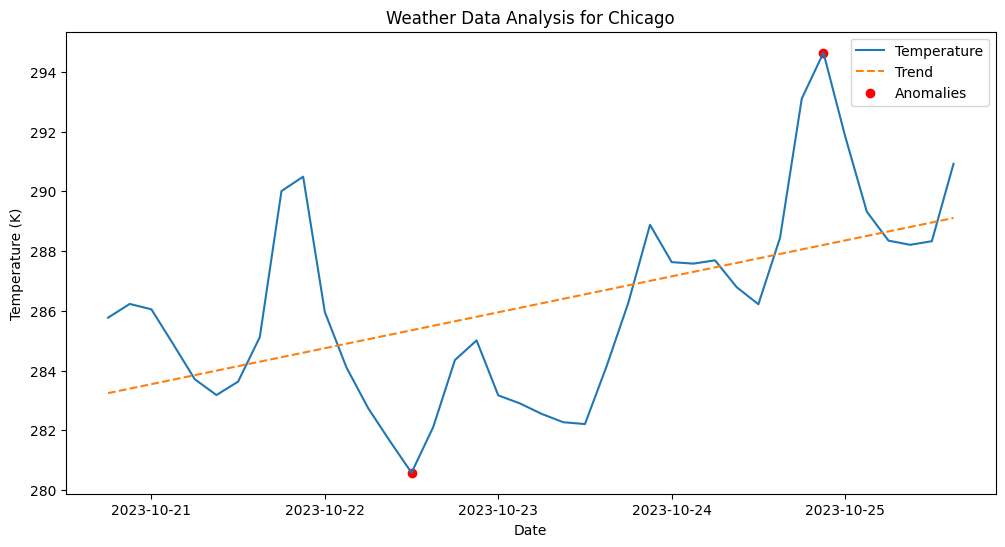

In [41]:
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# OpenWeatherMap API configuration
API_KEY = 'c446b12235ca04ae9dd8acc54f8c9107'
CITY = input("Enter the city name: ")  # Prompt the user to enter the city name
URL = f'http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}'

# Fetch weather data from the API
response = requests.get(URL)
weather_data = response.json()

# Extract relevant data (e.g., temperature, date)
data = []
for item in weather_data['list']:
    timestamp = item['dt']
    temperature = item['main']['temp']
    data.append({'timestamp': timestamp, 'temperature': temperature})

# Create a DataFrame for analysis
df = pd.DataFrame(data)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Trend prediction with linear regression
X = np.arange(len(df)).reshape(-1, 1)
y = df['temperature'].values

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

# Anomaly detection with Isolation Forest
clf = IsolationForest(contamination=0.05)
df['anomaly'] = clf.fit_predict(df[['temperature']])

# Plot the data, trend, and anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['temperature'], label='Temperature')
plt.plot(df['timestamp'], trend, label='Trend', linestyle='--')
plt.scatter(df[df['anomaly'] == -1]['timestamp'], df[df['anomaly'] == -1]['temperature'], c='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')
plt.legend()
plt.title('Weather Data Analysis for ' + CITY)
plt.show()


FINAL CODE


In [42]:
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
import psycopg2

# OpenWeatherMap API configuration
API_KEY = 'c446b12235ca04ae9dd8acc54f8c9107'
CITY = input("Enter the city name: ")
URL = f'http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}'

# Fetch weather data from the API
response = requests.get(URL)
weather_data = response.json()

# Extract relevant data (e.g., temperature, date)
data = []
for item in weather_data['list']:
    timestamp = item['dt']
    temperature = item['main']['temp']
    data.append({'timestamp': timestamp, 'temperature': temperature})

# Create a DataFrame for analysis
df = pd.DataFrame(data)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host='localhost',
    database='joelmendonsa',
    user='postgres',
    password='Duke#7539',
    port=5432
)
cursor = conn.cursor()

# Change the table name to "new_weather_data"
table_name = "new_weather_data"

# Create a table with the new name in the PostgreSQL database
cursor.execute(f"""
    CREATE TABLE IF NOT EXISTS {table_name} (
        timestamp TIMESTAMP,
        temperature FLOAT
    );
""")
conn.commit()

# Insert data into the "new_weather_data" table
for _, row in df.iterrows():
    cursor.execute(f"""
        INSERT INTO {table_name} (timestamp, temperature)
        VALUES (%s, %s);
    """, (row['timestamp'], row['temperature']))
conn.commit()

# Trend prediction and anomaly detection code goes here...

# Close the database connection
cursor.close()
conn.close()


In [45]:
conn = psycopg2.connect(
    host='localhost',
    database='joelmendonsa',
    user='postgres',
    password='Duke#7539',
    port=5432)
cursor = conn.cursor()
table_name = "new_weather_data"
cursor.execute(f"SELECT * FROM {table_name};")

for row in cursor.fetchall():
    timestamp, temperature = row
    print(f"Timestamp: {timestamp}, Temperature: {temperature} K")

cursor.close()
conn.close()


Timestamp: 2023-10-20 18:00:00, Temperature: 285.79 K
Timestamp: 2023-10-20 21:00:00, Temperature: 286.24 K
Timestamp: 2023-10-21 00:00:00, Temperature: 286.06 K
Timestamp: 2023-10-21 03:00:00, Temperature: 284.89 K
Timestamp: 2023-10-21 06:00:00, Temperature: 283.71 K
Timestamp: 2023-10-21 09:00:00, Temperature: 283.18 K
Timestamp: 2023-10-21 12:00:00, Temperature: 283.63 K
Timestamp: 2023-10-21 15:00:00, Temperature: 285.12 K
Timestamp: 2023-10-21 18:00:00, Temperature: 290.01 K
Timestamp: 2023-10-21 21:00:00, Temperature: 290.49 K
Timestamp: 2023-10-22 00:00:00, Temperature: 285.96 K
Timestamp: 2023-10-22 03:00:00, Temperature: 284.1 K
Timestamp: 2023-10-22 06:00:00, Temperature: 282.74 K
Timestamp: 2023-10-22 09:00:00, Temperature: 281.64 K
Timestamp: 2023-10-22 12:00:00, Temperature: 280.58 K
Timestamp: 2023-10-22 15:00:00, Temperature: 282.11 K
Timestamp: 2023-10-22 18:00:00, Temperature: 284.35 K
Timestamp: 2023-10-22 21:00:00, Temperature: 285.01 K
Timestamp: 2023-10-23 00:00:0